In [2]:
import pandas as pd

In [3]:
!ls

expl.ipynb  Exploratory.ipynb


In [4]:
!pwd

/home/ubuntu/satellite/code/4_analysis


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/satellite-datathon/sdthon/master/data/phase-02/data.csv")

In [6]:
data.head()

,cc_p20,cc_p40,cc_p60,cc_p80,cc_default,date,x,y,cc_p20_perc,cc_p40_perc,cc_p60_perc,cc_p80_perc,cc_default_perc,harvested,ndvi
0,6544,3345,2282,1373,3939.0,2016-12-22,1536,1024,2.5,1.3,0.9,0.5,1.5,1338,0.376255
1,153575,128580,116580,103725,137716.0,2017-01-01,1536,1024,58.6,49.0,44.5,39.6,52.5,2927,0.320048
2,90259,64761,50951,33642,74579.0,2017-01-11,1536,1024,34.4,24.7,19.4,12.8,28.4,386,0.386997
3,65297,49758,41128,33783,56316.0,2017-02-10,1536,1024,24.9,19.0,15.7,12.9,21.5,30,0.533278
4,259716,243897,227199,209770,249936.0,2017-02-20,1536,1024,99.1,93.0,86.7,80.0,95.3,227,0.432936


In [7]:
df = data[(data['x'] == 1536) & (data['y'] == 1024)]

In [8]:
import matplotlib.pyplot as plt

In [9]:
df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'),utc=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.index = df['date']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


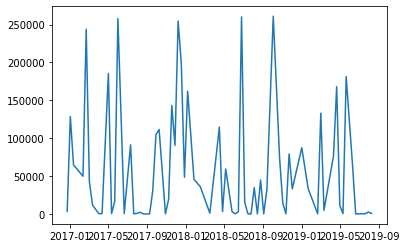

In [11]:
plt.plot(df['cc_p40'])

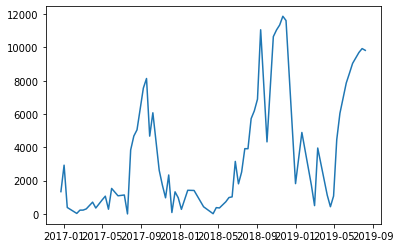

In [12]:
plt.plot(df['harvested'])

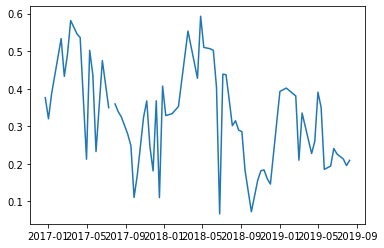

In [13]:
plt.plot(df['ndvi'])

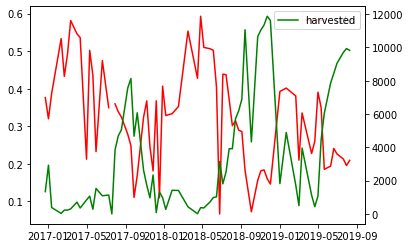

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['ndvi'], 'r', label='ndvi')
ax2 = ax.twinx()
ax2.plot(df['harvested'], 'g', label='harvested')
#plt.legend(loc='best')
ax2.legend(loc='best')
ax.legend(loc=0)
plt.draw()


In [21]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.set(rc={'figure.figsize':(8, 5.7)})

<Figure size 1152x432 with 0 Axes>

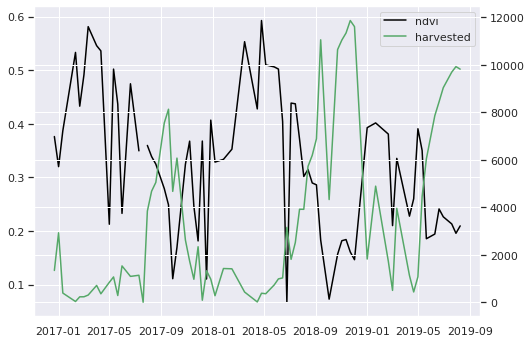

In [22]:
fig, ax = plt.subplots(1, 1)
ln1 = ax.plot(df['ndvi'], 'black', label='ndvi')
ax2 = ax.twinx()
ln2 = ax2.plot(df['harvested'], 'g', label='harvested')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.draw()


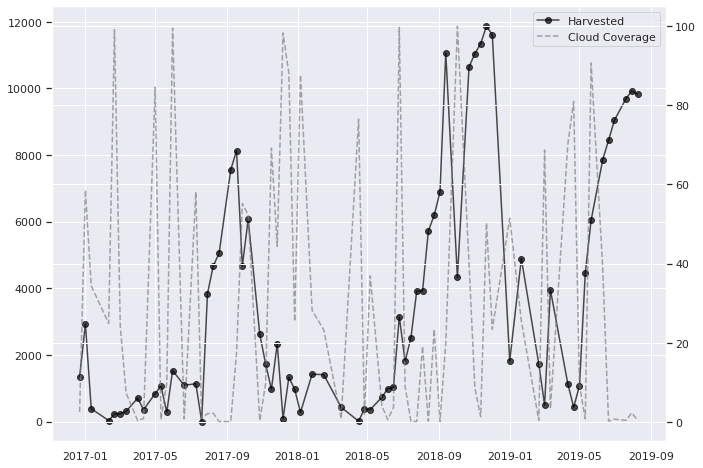

In [40]:
sns.set(rc={'figure.figsize':(11, 8)})
fig, ax = plt.subplots(1, 1)

ln1 = ax.plot(df['date'], df['harvested'], 'bo-', alpha=0.7, label='Harvested', color='black')
ax2 = ax.twinx()
ln2 = ax2.plot(df['date'], df['cc_p20_perc'], '--',color='gray',alpha=0.7, label='Cloud Coverage')
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.draw()


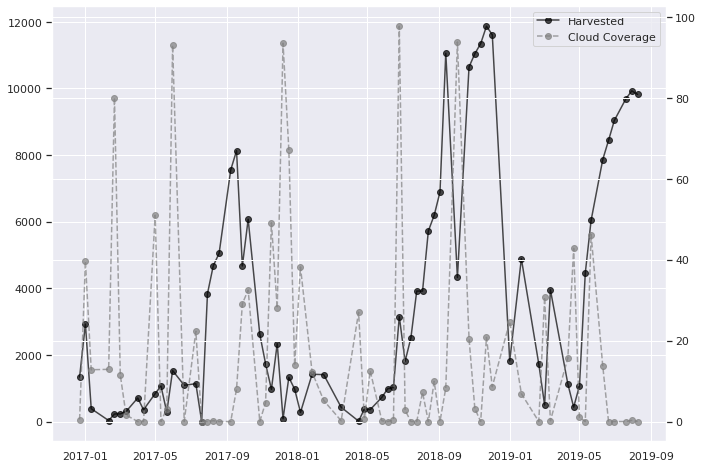

In [46]:
sns.set(rc={'figure.figsize':(11, 8)})
fig, ax = plt.subplots(1, 1)

ln1 = ax.plot(df['date'], df['harvested'], 'bo-', alpha=0.7, label='Harvested', color='black')
ax2 = ax.twinx()
#ln2 = ax2.plot(df['date'], df['cc_p80_perc'], '--',color='gray',alpha=0.7, label='Cloud Coverage')
ln2 = ax2.plot(df['date'], df['cc_p80_perc'], 'bo-', color='gray',alpha=0.7, label='Cloud Coverage', linestyle='--')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.draw()


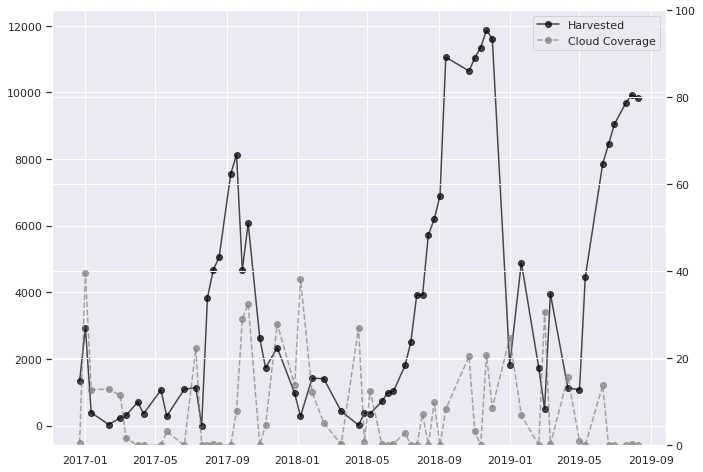

In [50]:
sns.set(rc={'figure.figsize':(11, 8)})
fig, ax = plt.subplots(1, 1)

ln1 = ax.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['harvested'], 'bo-', alpha=0.7, label='Harvested', color='black')

ax2 = ax.twinx()
ax2.set_ylim([0, 100]) 
ln2 = ax2.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['cc_p80_perc'], 'bo-', color='gray',alpha=0.7, label='Cloud Coverage', linestyle='--')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.draw()


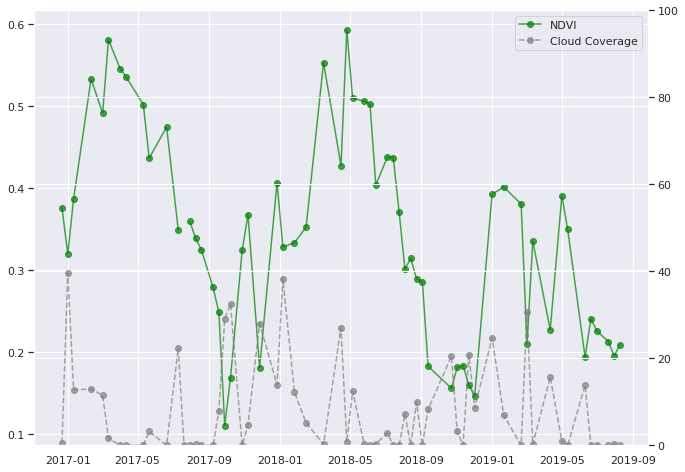

In [53]:
sns.set(rc={'figure.figsize':(11, 8)})
fig, ax = plt.subplots(1, 1)

ln1 = ax.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['ndvi'], 'bo-', alpha=0.7, label='NDVI', color='green')

ax2 = ax.twinx()
ax2.set_ylim([0, 100]) 
ln2 = ax2.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['cc_p80_perc'], 'bo-', color='gray',alpha=0.7, label='Cloud Coverage', linestyle='--')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.draw()


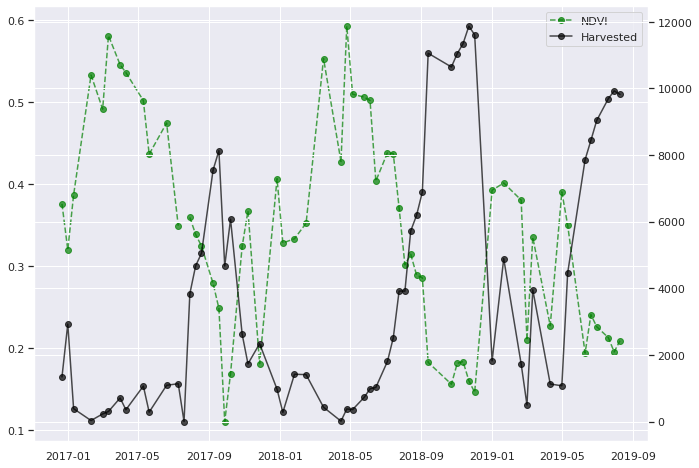

In [56]:
sns.set(rc={'figure.figsize':(11, 8)})
fig, ax = plt.subplots(1, 1)

ln1 = ax.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['ndvi'], 'bo-', alpha=0.7, label='NDVI', color='green', linestyle='--')

ax2 = ax.twinx()
ln2 = ax2.plot(df[df['cc_p80_perc'] < 40]['date'], df[df['cc_p80_perc'] < 40]['harvested'], 'bo-', color='black',alpha=0.7, label='Harvested')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.draw()


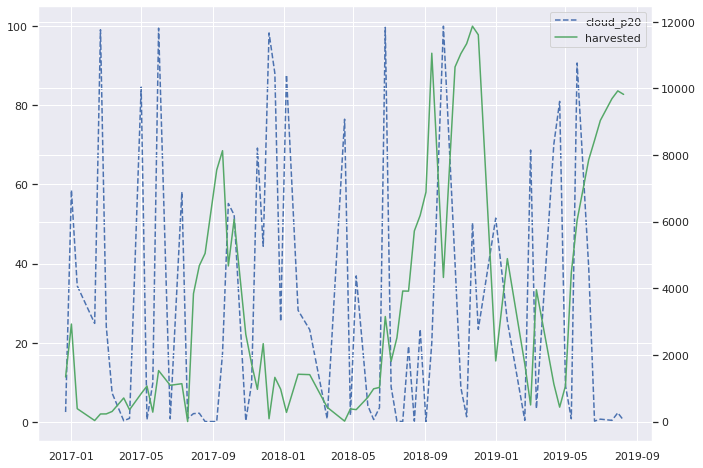

In [41]:
fig, ax = plt.subplots(1, 1)
ln1 = ax.plot(df['cc_p20_perc'], 'b', label='cloud_p20', linestyle='--')
ax2 = ax.twinx()
ln2 = ax2.plot(df['harvested'], 'g', label='harvested')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.draw()


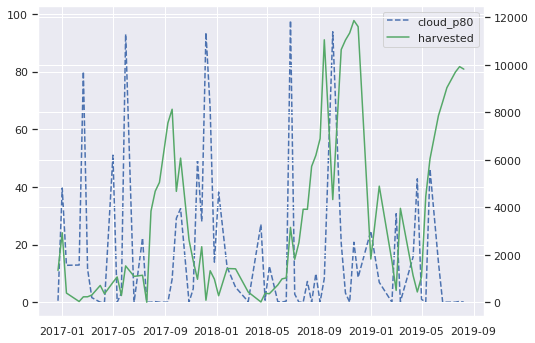

In [23]:
fig, ax = plt.subplots(1, 1)
ln1 = ax.plot(df['cc_p80_perc'], 'b', label='cloud_p80', linestyle='--')
ax2 = ax.twinx()
ln2 = ax2.plot(df['harvested'], 'g', label='harvested')

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.draw()


In [19]:
# count the cloud pixels

In [20]:
def plot_water_levels(df, max_coverage=1.0):
    fig, ax = plt.subplots(figsize=(20,7))

    dates = np.asarray(df.timestamp)
    ax.plot(dates[df.scalar['COVERAGE'][...,0] < max_coverage],
            df.scalar['WATER_LEVEL'][df.scalar['COVERAGE'][...,0] < max_coverage],
            'bo-',alpha=0.7, label='Water Level')
    ax.plot(dates[df.scalar['COVERAGE'][...,0] < max_coverage],
            df.scalar['COVERAGE'][df.scalar['COVERAGE'][...,0] < max_coverage],
            '--',color='gray',alpha=0.7, label='Cloud Coverage')
    ax.set_ylim(0.0,1.1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Water Level')
    ax.set_title('Detected Water Level')
    ax.grid(axis='y')
    ax.legend(loc='best')
    return ax
